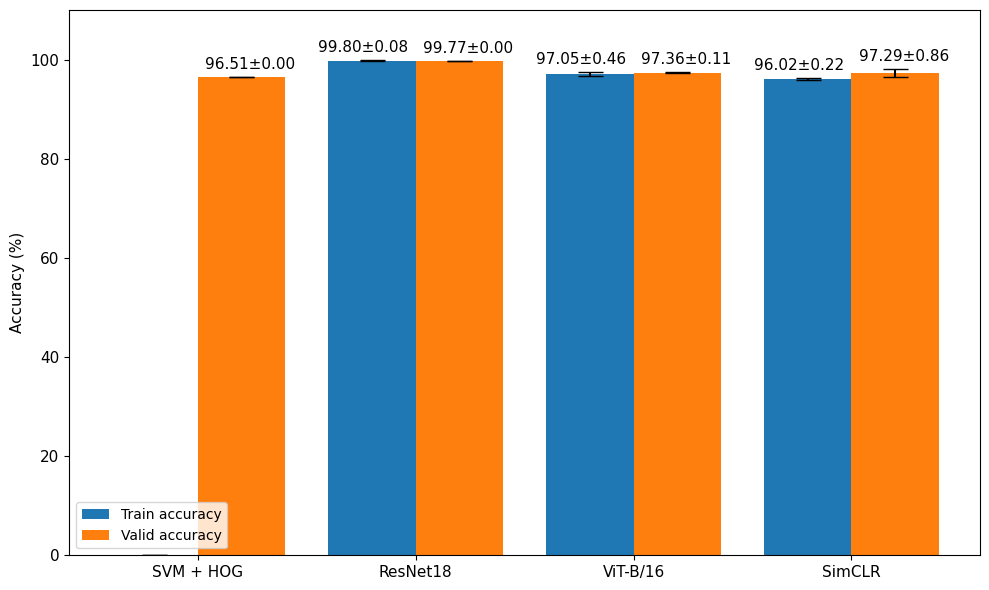

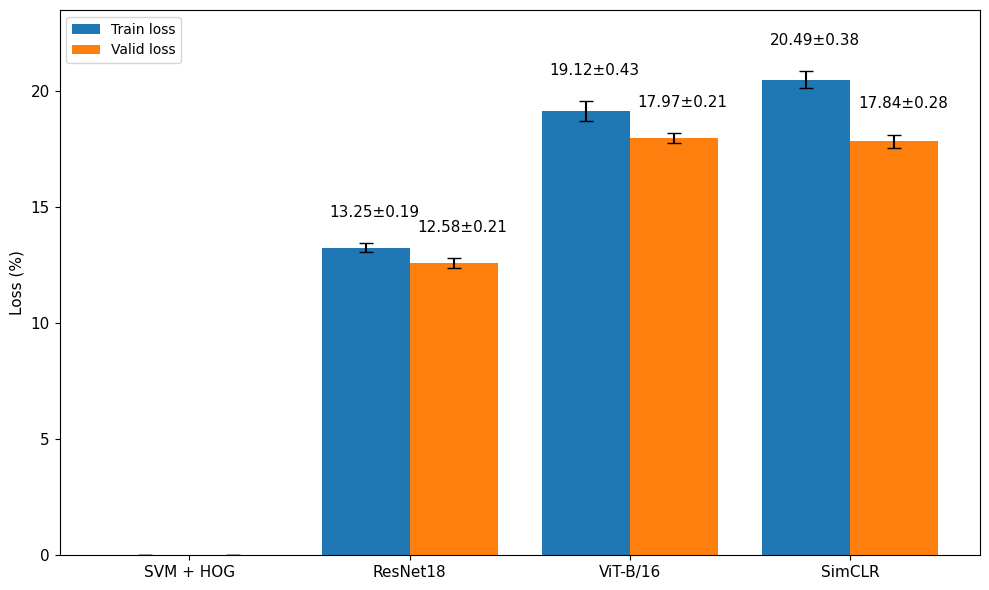

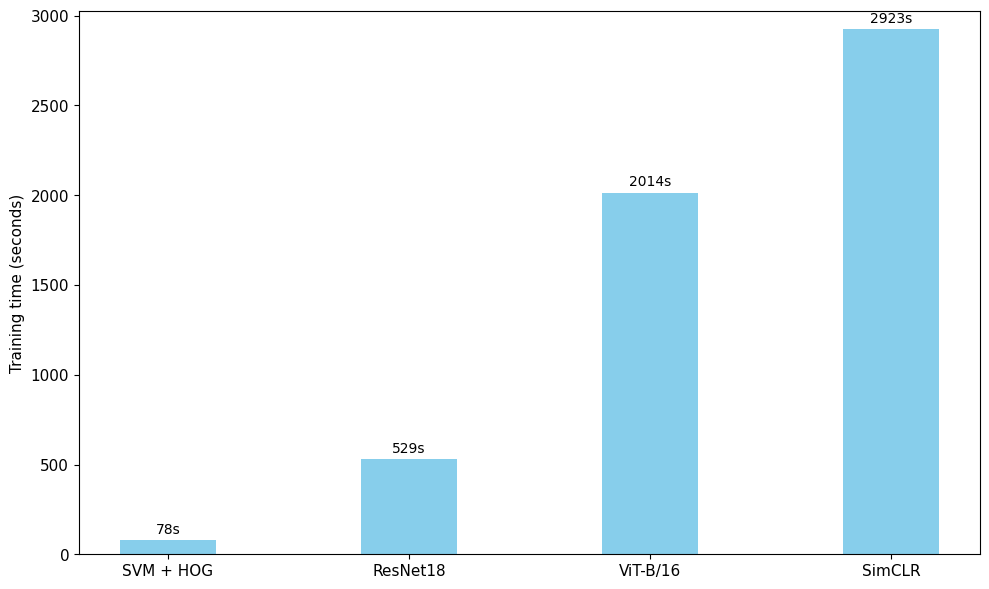

In [1]:
import matplotlib.pyplot as plt
import numpy as np

models = ['SVM + HOG', 'ResNet18', 'ViT-B/16', 'SimCLR']
x = np.arange(len(models))
bar_width = 0.4

# Accuracy (mean ± std)
train_acc_mean = [0, 99.80, 97.05, 96.02]
train_acc_std = [0, 0.08, 0.46, 0.22]


val_acc_mean = [96.51, 99.77, 97.36, 97.29]
val_acc_std = [0.00, 0.00, 0.11, 0.86]


# Loss (mean ± std)
train_loss_mean = [0, 13.25, 19.12, 20.49]
train_loss_std = [0, 0.19, 0.43, 0.38]


val_loss_mean = [0, 12.58, 17.97, 17.84]
val_loss_std = [0, 0.21, 0.21, 0.28]

training_time = [78, 529, 2014, 2923]

# the Function to label bars with mean ± std
def annotate_bars(ax, bars, stds, offset_direction=1):
    for bar, std in zip(bars, stds):
        height = bar.get_height()
        if height > 0:
            offset = 0.04 * offset_direction
            ax.text(bar.get_x() + bar.get_width()/2 + offset,
            height + std + 1,
            f'{height:.2f}±{std:.2f}',
            ha='center', va='bottom', fontsize=11)

# plot accuracy
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - bar_width/2, train_acc_mean, bar_width, yerr=train_acc_std, label='Train accuracy', capsize=9)
bars2 = ax.bar(x + bar_width/2, val_acc_mean, bar_width, yerr=val_acc_std, label='Valid accuracy', capsize=9)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.set_ylabel('Accuracy (%)', fontsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.set_title('')
ax.set_ylim(0, 110)
ax.legend(loc='lower left')
annotate_bars(ax, bars1, train_acc_std, offset_direction=-1)
annotate_bars(ax, bars2, val_acc_std, offset_direction=1)
plt.tight_layout()
plt.show()

# plot loss
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - bar_width/2, train_loss_mean, bar_width, yerr=train_loss_std, label='Train loss', capsize=5)
bars2 = ax.bar(x + bar_width/2, val_loss_mean, bar_width, yerr=val_loss_std, label='Valid loss', capsize=5)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.set_ylabel('Loss (%)', fontsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.set_title('')
ax.legend(loc='upper left')
annotate_bars(ax, bars1, train_loss_std)
annotate_bars(ax, bars2, val_loss_std)
ax.set_ylim(0, max(max(train_loss_mean), max(val_loss_mean)) + 3)
plt.tight_layout()
plt.show()

# plot trainig time
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(x, training_time, bar_width, color = 'skyblue')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.set_ylabel('Training time (seconds)', fontsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.set_title('')
for bar, time in zip(bars, training_time):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()+20, f'{time}s', ha='center', va='bottom',fontsize=10)
ax.set_ylim(0, max(training_time)+100)
plt.tight_layout()
plt.show()